In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.metrics as metric
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
url='https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-tax-gnp-bd.csv'
df = pd.read_csv(url)
df.head()

,YEAR,GNP,POPULATION,TAX
0,1980,1499.68,82.498,19.400
1,1981,1583.50,84.764,22.500
2,1982,1634.27,87.061,24.400
3,1983,1709.60,89.400,27.000
4,1984,1781.02,91.804,32.265


In [5]:
df.shape

(40, 4)

In [7]:
df.describe()

,YEAR,GNP,POPULATION,TAX
count,40.000000,40.000000,40.000000,40.000000
mean,1999.500000,4422.409750,128.143125,550.697775
std,11.690452,2772.821477,25.777876,671.634099
min,1980.000000,1499.680000,82.498000,19.400000
25%,1989.750000,2184.820000,106.734250,108.597000
50%,1999.500000,3469.280000,131.175000,224.658500
75%,2009.250000,5999.877500,149.908500,700.035000
max,2019.000000,11461.940000,166.586000,2547.920000


<Axes: xlabel='POPULATION', ylabel='GNP'>

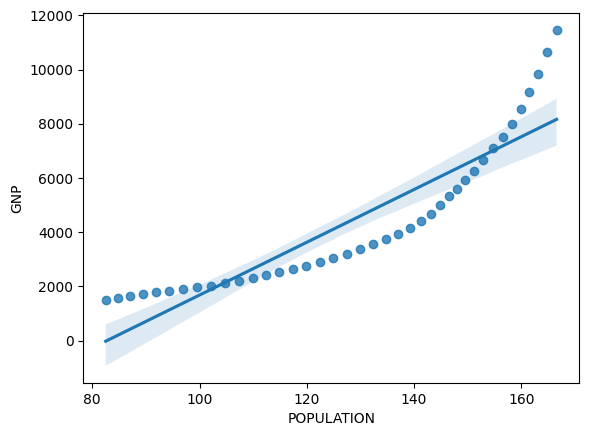

In [19]:
sns.regplot(x=df.POPULATION, y=df.GNP)

<Axes: xlabel='POPULATION', ylabel='GNP'>

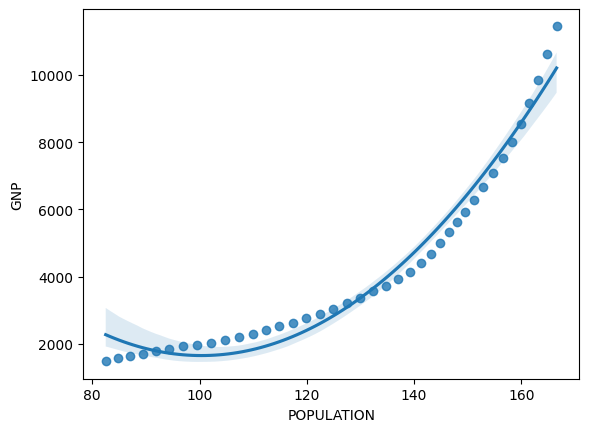

In [35]:
sns.regplot(x=df.POPULATION, y=df.GNP, data=df, order=2)

<Axes: xlabel='POPULATION', ylabel='GNP'>

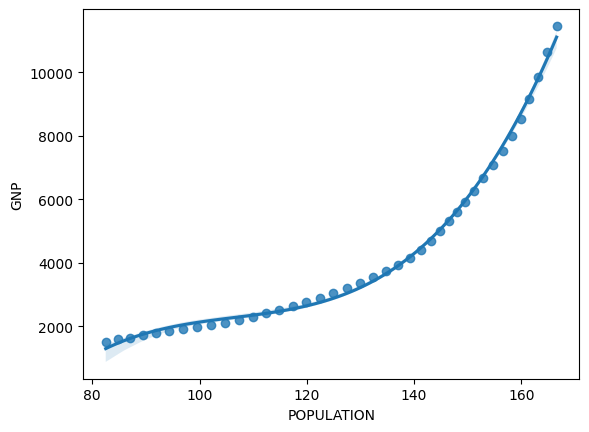

In [25]:
sns.regplot(x=df.POPULATION, y=df.GNP, data=df, order=3)

In [31]:
x = df['POPULATION'].values.reshape(-1,1)
y = df['GNP'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
pf = PolynomialFeatures(degree=3)

x_ = pf.fit_transform(x)
x_test_ = pf.fit_transform(x_test)

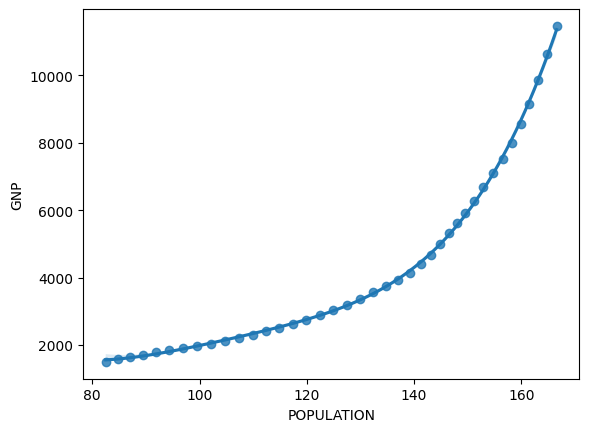

In [39]:
ax = sns.regplot(x=df.POPULATION, y=df.GNP, data=df, order=4)

In [41]:
poly = LinearRegression()
poly.fit(x_,y)
poly.coef_

array([[ 0.00000000e+00,  1.20802698e+03, -1.11503188e+01,
         3.49081200e-02]])

In [47]:
prediction = poly.predict(x_test_)

print('Coefficients: ', poly.coef_)
print('Intercept: ', poly.intercept_)
print('MAE: ', metric.mean_absolute_error(y_test, prediction))
print('MSE: ', metric.mean_squared_error(y_test, prediction))
print('RMSE: ', np.sqrt(metric.mean_squared_error(y_test, prediction)))

Coefficients:  [[ 0.00000000e+00  1.20802698e+03 -1.11503188e+01  3.49081200e-02]]
Intercept:  [-42077.2106119]
MAE:  108.70454949308491
MSE:  21057.19644698964
RMSE:  145.1109797602843


In [67]:
accuracy2 = poly.score(x_test_,y_test)
print('AccuracyII: ',accuracy2*100,'%')

AccuracyII:  99.7955595500352 %


In [55]:
yhat = {'POPULATION': ['300']}
yhatDf = pd.DataFrame(yhat)

yhatDf = yhatDf['POPULATION'].values.reshape(-1,1)

polyFit = pf.fit_transform(yhatDf)
poly.predict(polyFit)

array([[259321.43051668]])

In [65]:
# Comparison with Linear regression

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

predictionsLN = linear_reg.predict(x_test)

print('Coefficients:', linear_reg.coef_)
print('Intercept:', linear_reg.intercept_)
print('MAE:', metric.mean_absolute_error(y_test, predictionsLN))
print('MSE:', metric.mean_squared_error(y_test, predictionsLN))
print('RMSE:', np.sqrt(metric.mean_squared_error(y_test, predictionsLN)))

Coefficients: [[90.65355032]]
Intercept: [-7239.6842659]
MAE: 1213.5983808740225
MSE: 2353784.746034654
RMSE: 1534.2049230903458


In [69]:
accuracy3 = linear_reg.score(x_test,y_test)
print('AccuracyIII:',accuracy3*100,'%')

AccuracyII: 77.14753652932666 %
